# Lab: Support Vector Machines

We use the `e1071` library in `R` to demonstrate the
support vector classifier and the SVM. Another option is the `LiblineaR` library,  which is
useful for very large linear problems.

## Support Vector Classifier

The `e1071` library contains
implementations for a number of statistical learning methods. In
particular, the `svm()` function can be used to fit a support
vector classifier when the argument `kernel = "linear"` is used.
This function uses a slightly different formulation from
(9.14) and (9.25) for the support vector
classifier.  A `cost` argument allows us to specify the cost of
a violation to the margin.  When the `cost` argument is small,
then the margins will be wide and many support vectors will be on the
margin or will violate the margin.  When the `cost` argument is
large, then the margins will be narrow and there will be few support
vectors on the margin or violating the margin.

We now use the `svm()` function to fit the support vector classifier for a given value of the `cost` parameter.
Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary. We begin by generating
the observations, which belong to two classes, and checking whether the classes are linearly separable.

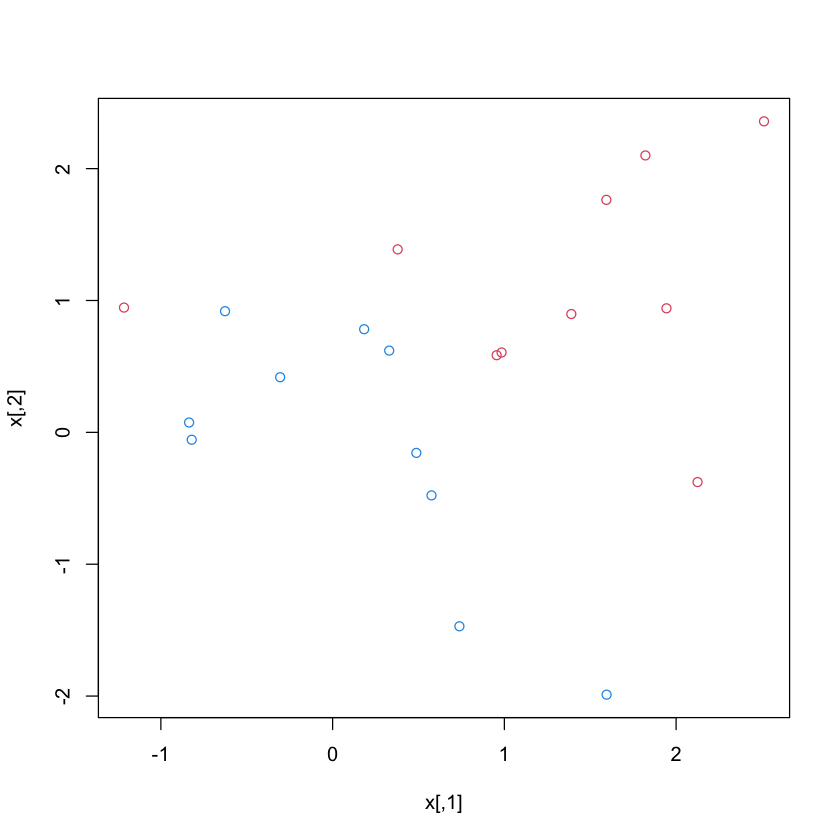

In [3]:
set.seed(1)
x <- matrix(rnorm(20 * 2), ncol = 2)
y <- c(rep(-1, 10), rep(1, 10))
x[y == 1, ] <- x[y == 1, ] + 1
plot(x, col = (3 - y))

They are not. Next, we fit the support vector classifier. Note that in order for the `svm()` function to perform classification (as opposed to SVM-based regression), we must encode the response as a factor variable.
We now create a data frame with the response coded as a factor.

In [5]:
y = as.factor(y) #Setups up data as categories
print(y)

 [1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 1  1  1  1  1  1  1  1  1  1 
Levels: -1 1


In [7]:
dat <- data.frame(x = x, y = as.factor(y))
library(e1071)
svmfit <- svm(y ~ ., data = dat, kernel = "linear", 
    cost = 10, scale = FALSE)

The argument `scale = FALSE` tells the `svm()` function not to scale each feature to have mean zero or standard deviation one; depending on the application, one might prefer to use `scale = TRUE`.

We can now plot the support vector classifier obtained:

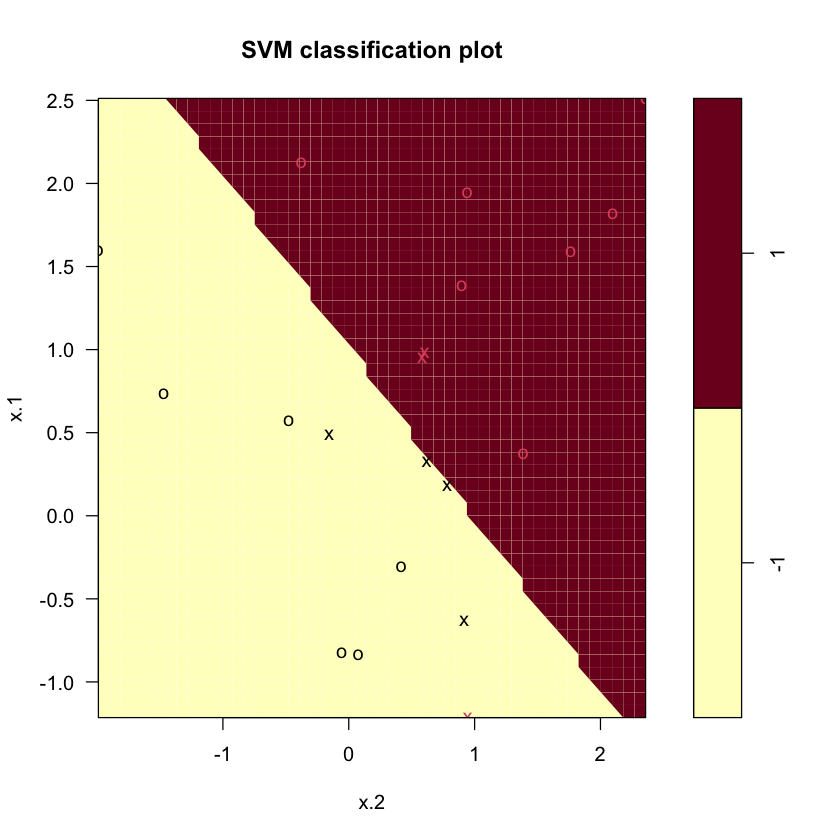

In [8]:
plot(svmfit, dat)

Note that the two arguments to the SVM
`plot()` function are the output of the call to `svm()`, as well as the data used in the call to `svm()`.
The region of feature space that will be assigned to the $-1$ class is shown in light yellow, and the region that will be assigned to the $+1$ class is shown in red.
The decision boundary between the two classes is linear (because we used the argument `kernel = "linear"`), though due to the
way in which the plotting function is implemented in this library the decision boundary looks somewhat jagged in the plot. (Note that here the second feature is plotted on the $x$-axis and the first feature is plotted on the $y$-axis, in contrast to the behavior of the usual `plot()` function in `R`.)
The support vectors are plotted as crosses and the remaining observations are plotted as circles; we see here that there are seven support vectors. We can determine their identities as follows:

In [4]:
svmfit$index

[1]  1  2  5  7 14 16 17

We can obtain some basic information about the support vector classifier fit using the `summary()` command:

In [9]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




This tells us, for instance, that a linear kernel was used with `cost = 10`, and that there were seven support vectors, four in one class and three in the other.

What if we instead used a smaller value of the cost parameter?

In [ ]:
svmfit <- svm(y ~ ., data = dat, kernel = "linear", 
    cost = 0.1, scale = FALSE)
plot(svmfit, dat)
svmfit$index

Now that a smaller value of the cost parameter is being used, we obtain a larger number of support vectors, because the margin is now wider. Unfortunately, the `svm()` function does not explicitly output the coefficients of the linear decision boundary obtained when the support vector classifier is fit, nor does it output the width of the margin.

The `e1071` library includes a built-in function, `tune()`, to perform cross-validation. By default, `tune()` performs ten-fold cross-validation on a set of models of interest. In order to use this function, we pass in relevant information about the set of models that are under consideration. The following command indicates that we want to compare SVMs with a linear kernel, using a range of values of the `cost` parameter.

In [ ]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat, kernel = "linear", 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)))

We can easily access the cross-validation errors for each of these models using the `summary()` command:

In [ ]:
summary(tune.out)

We see that  `cost = 0.1` results in the lowest cross-validation error rate.
The `tune()` function stores the best model obtained, which can be accessed as follows:

In [ ]:
bestmod <- tune.out$best.model
summary(bestmod)

The `predict()` function can be used to predict the class label on a set of test observations, at any given value of the cost parameter. We begin by generating a
test data set.

In [ ]:
xtest <- matrix(rnorm(20 * 2), ncol = 2)
ytest <- sample(c(-1, 1), 20, rep = TRUE)
xtest[ytest == 1, ] <- xtest[ytest == 1, ] + 1
testdat <- data.frame(x = xtest, y = as.factor(ytest))

Now we predict the class labels of these test observations. Here we use the best model obtained through cross-validation in order to make predictions.

In [ ]:
ypred <- predict(bestmod, testdat)
table(predict = ypred, truth = testdat$y)

Thus, with this value of `cost`, 17 of the test observations are correctly classified.
What if we had instead used `cost = 0.01`?

In [ ]:
svmfit <- svm(y ~ ., data = dat, kernel = "linear", 
    cost = .01, scale = FALSE)
ypred <- predict(svmfit, testdat)
table(predict = ypred, truth = testdat$y)

In this case three additional observations are misclassified.

Now consider a situation in which the two classes are linearly separable. Then we can
find a separating hyperplane using the `svm()` function.
We first further separate the two classes in our simulated data so that they are linearly separable:

In [ ]:
x[y == 1, ] <- x[y == 1, ] + 0.5
plot(x, col = (y + 5) / 2, pch = 19)

Now the observations are just barely linearly separable.
We fit the support vector classifier and plot the resulting hyperplane, using a very large value of `cost` so that no observations are misclassified.

In [ ]:
dat <- data.frame(x = x, y = as.factor(y))
svmfit <- svm(y ~ ., data = dat, kernel = "linear", 
    cost = 1e5)
summary(svmfit)
plot(svmfit, dat)

No training errors were made and only three support vectors were used.
However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform poorly on test data. We now try a smaller value of `cost`:

In [ ]:
svmfit <- svm(y ~ ., data = dat, kernel = "linear", cost = 1)
summary(svmfit)
plot(svmfit, dat)

Using `cost = 1`, we misclassify a training observation, but we also obtain a much wider margin and make use of seven support vectors. It seems likely that this model will perform better on test data than the model with 
 `cost = 1e5`.

## Support Vector Machine

In order to fit an SVM using a non-linear kernel, we once again use the `svm()` function. However, now we use a different value of the parameter `kernel`. To
fit an SVM with a polynomial kernel we use `kernel = "polynomial"`, and to fit an SVM with a radial kernel   we use `kernel = "radial"`.
In the former case we also use the `degree` argument to specify a degree for the polynomial kernel (this is $d$ in (9.22)), and in the latter case we use `gamma` to specify a value of $\gamma$ for the radial basis kernel (9.24).

We first generate some data with a non-linear class boundary, as follows:

In [ ]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] <- x[1:100, ] + 2
x[101:150, ] <- x[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))

Plotting the data makes it clear that the class boundary is indeed non-linear:

In [ ]:
plot(x, col = y)

The data is randomly split into training and testing groups. We then fit the training data using the `svm()` function with a radial kernel and $\gamma=1$:

In [ ]:
train <- sample(200, 100)
svmfit <- svm(y ~ ., data = dat[train, ], kernel = "radial",  
    gamma = 1, cost = 1)
plot(svmfit, dat[train, ])

The plot shows that the resulting  SVM has a decidedly non-linear  boundary. The `summary()` function can be used to obtain some  information about the SVM fit:

In [ ]:
summary(svmfit)

We can see from the figure that there are a fair number of training errors in this SVM fit.
If we increase the value of `cost`, we can reduce the number of
training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

In [ ]:
svmfit <- svm(y ~ ., data = dat[train, ], kernel = "radial", 
    gamma = 1, cost = 1e5)
plot(svmfit, dat[train, ])

We can perform cross-validation using `tune()` to select the best choice of $\gamma$ and `cost` for an SVM with a radial kernel:

In [ ]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat[train, ], 
    kernel = "radial", 
    ranges = list(
      cost = c(0.1, 1, 10, 100, 1000),
      gamma = c(0.5, 1, 2, 3, 4)
    )
  )
summary(tune.out)

Therefore, the best choice of parameters involves `cost = 1` and `gamma = 0.5`.
We can view the test set predictions for this model by applying the `predict()` function to the data. Notice that to do this we subset the dataframe `dat` using `-train` as an index set.

In [ ]:
table(
    true = dat[-train, "y"], 
    pred = predict(
      tune.out$best.model, newdata = dat[-train, ]
      )
    )

$12\,\%$ of test observations are misclassified by this SVM.

## ROC Curves

The `ROCR` package can be used to produce ROC curves such as those in Figures9.10 and 9.11. We first write a short function to plot an ROC curve given a vector containing a numerical score for each observation, `pred`, and
a vector containing the class label for each observation, `truth`.

In [ ]:
library(ROCR)
rocplot <- function(pred, truth, ...) {
  predob <- prediction(pred, truth)
  perf <- performance(predob, "tpr", "fpr")
  plot(perf, ...)
}

SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain *fitted values* for each observation, which are the numerical scores used to obtain the class labels. For instance, in the case of a support vector
classifier, the fitted value for an observation $X= (X_1, X_2, \ldots, X_p)^T$ takes the form $\hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \cdots + \hat{\beta}_p X_p$. For an SVM with a non-linear kernel, the equation that yields the fitted value is given in (9.23). In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero then it is assigned to the other.
In order to obtain the fitted values for a given SVM model fit, we use `decision.values = TRUE` when fitting `svm()`.
Then the `predict()` function will output the fitted values.

In [ ]:
svmfit.opt <- svm(y ~ ., data = dat[train, ], 
    kernel = "radial", gamma = 2, cost = 1, 
    decision.values = T)
fitted <- attributes(
    predict(svmfit.opt, dat[train, ], decision.values = TRUE)
  )$decision.values

Now we can produce the ROC plot. Note we use the negative of the fitted values so that negative values correspond to class 1 and positive values to class 2.

SVM appears to be producing accurate predictions. By increasing $\gamma$ we can produce a more flexible fit and generate further improvements in accuracy.

In [ ]:
rocplot(-fitted, dat[train, "y"], main = "Training Data")
svmfit.flex <- svm(y ~ ., data = dat[train, ], 
    kernel = "radial", gamma = 50, cost = 1, 
    decision.values = T)
fitted <- attributes(
    predict(svmfit.flex, dat[train, ], decision.values = T)
  )$decision.values
rocplot(-fitted, dat[train, "y"], add = T, col = "red")

However, these ROC curves are all on the training data. We are really more interested in the level of prediction accuracy on the test data. When we compute the ROC curves on the test data, the model with $\gamma=2$ appears to provide the most accurate results.

In [ ]:
fitted <- attributes(
    predict(svmfit.opt, dat[-train, ], decision.values = T)
  )$decision.values
rocplot(-fitted, dat[-train, "y"], main = "Test Data")
fitted <- attributes(
    predict(svmfit.flex, dat[-train, ], decision.values = T)
  )$decision.values
rocplot(-fitted, dat[-train, "y"], add = T, col = "red")

## SVM with Multiple Classes

If the response is a factor containing more than two levels, then the `svm()` function will  perform multi-class classification using the one-versus-one approach. We explore that setting here by generating a third class of observations.

In [ ]:
set.seed(1)
x <- rbind(x, matrix(rnorm(50 * 2), ncol = 2))
y <- c(y, rep(0, 50))
x[y == 0, 2] <- x[y == 0, 2] + 2
dat <- data.frame(x = x, y = as.factor(y))
par(mfrow = c(1, 1))
plot(x, col = (y + 1))

We now fit an SVM to the data:

In [ ]:
svmfit <- svm(y ~ ., data = dat, kernel = "radial", 
    cost = 10, gamma = 1)
plot(svmfit, dat)

The `e1071` library can also be used to perform support vector regression, if the response vector that is passed in to `svm()` is numerical rather than a factor.

## Application to Gene Expression Data

We now examine the `Khan` data set, which  consists of a number of tissue samples corresponding to four distinct types of small
round blue cell tumors. For each tissue sample, gene expression measurements are available.
The data set consists of training data, `xtrain` and `ytrain`, and testing data, `xtest` and `ytest`.

We examine the dimension of the data:

In [ ]:
library(ISLR2)
names(Khan)
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)

This data set consists of expression measurements for $2{,}308$  genes.  The training and test sets consist of $63$ and $20$ observations respectively.

In [ ]:
table(Khan$ytrain)
table(Khan$ytest)

We will use a support vector approach to predict cancer subtype using gene expression measurements.
In this data set, there are a very large number of  features relative to the number of observations. This suggests that we should use a  linear kernel, because the additional flexibility that will
result from using a polynomial or radial kernel is unnecessary. 


In [ ]:
dat <- data.frame(
    x = Khan$xtrain, 
    y = as.factor(Khan$ytrain)
  )
out <- svm(y ~ ., data = dat, kernel = "linear", 
    cost = 10)
summary(out)
table(out$fitted, dat$y)

We  see that there are *no* training errors. In fact, this is not surprising, because
the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes. We are most interested not in the support vector classifier's performance on the training observations, but rather its performance on the test observations.

In [ ]:
dat.te <- data.frame(
    x = Khan$xtest, 
    y = as.factor(Khan$ytest))
pred.te <- predict(out, newdata = dat.te)
table(pred.te, dat.te$y)

We see that using `cost = 10` yields two test set errors on this
data.